## Importing libraries

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [43]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [44]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [49]:
train = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [50]:
train[train['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [51]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])


In [52]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## data visualization

In [53]:
train['AgeGroup'] = pd.cut(train['Age'], bins=range(0, 101, 10))
train['AgeGroup'].value_counts().sort_index()


(0, 10]       64
(10, 20]     115
(20, 30]     407
(30, 40]     155
(40, 50]      86
(50, 60]      42
(60, 70]      17
(70, 80]       5
(80, 90]       0
(90, 100]      0
Name: AgeGroup, dtype: int64

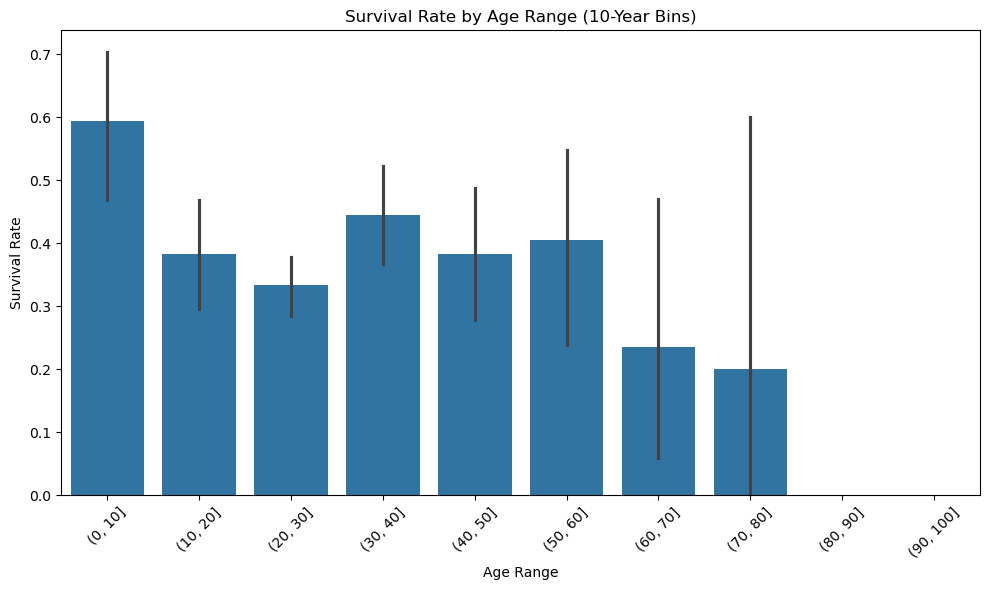

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.title('Survival Rate by Age Range (10-Year Bins)')
plt.xlabel('Age Range')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


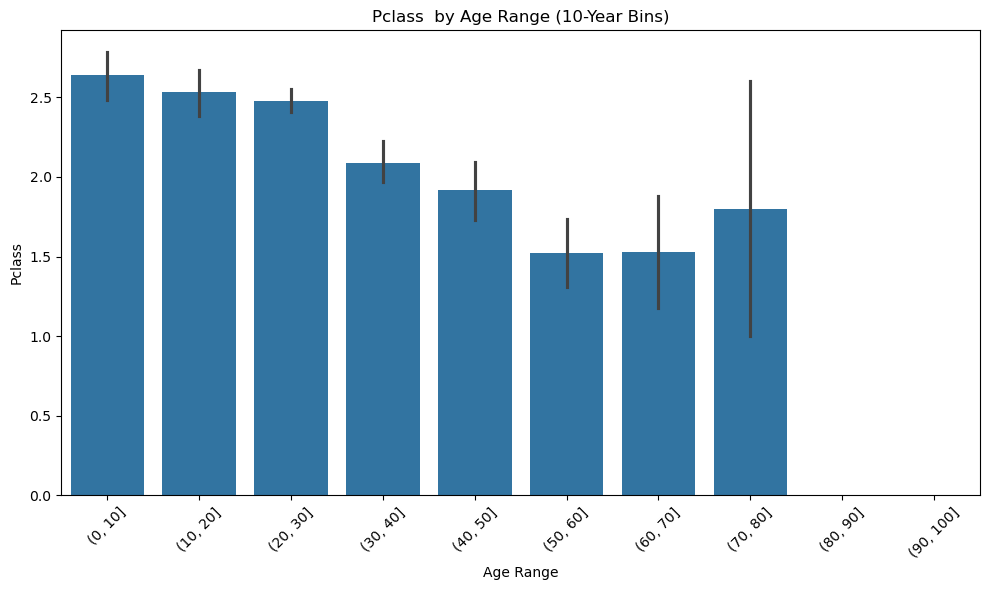

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x='AgeGroup', y='Pclass', data=train)
plt.title('Pclass  by Age Range (10-Year Bins)')
plt.xlabel('Age Range')
plt.ylabel('Pclass')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

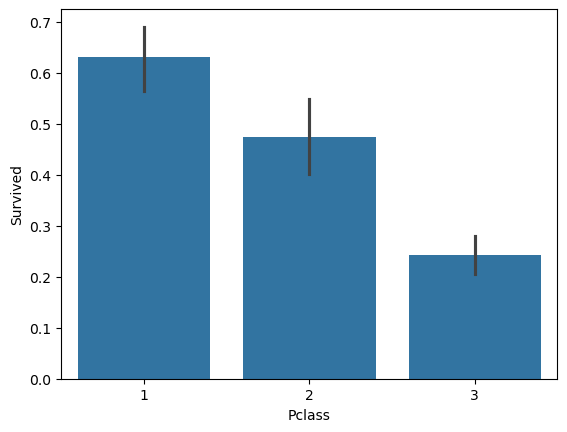

In [56]:
sns.barplot(x='Pclass',y='Survived',data=train)

<Axes: xlabel='Sex', ylabel='Pclass'>

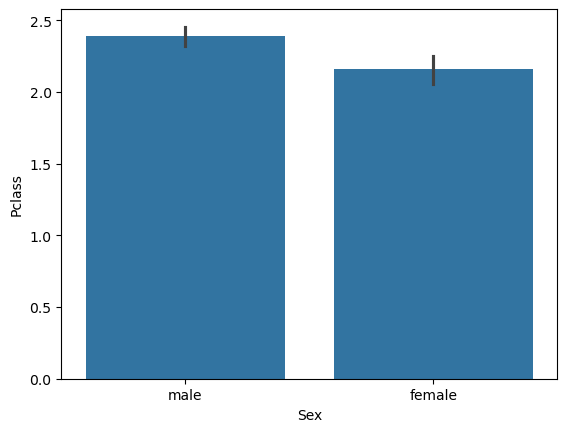

In [57]:
sns.barplot(x='Sex',y='Pclass',data=train)

## Data preprocessing

In [58]:
train = train.drop(['AgeGroup'],axis=1)


In [59]:
from sklearn.preprocessing import StandardScaler


In [60]:
train["Sex"]=train['Sex'].replace({'female':0,'male':1})
test["Sex"]=test['Sex'].replace({'female':0,'male':1})


In [61]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [62]:
test["Age"] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [63]:
X_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']

In [64]:
X_train =pd.get_dummies(X_train,columns=['Embarked'])
X_test =pd.get_dummies(test,columns=['Embarked'])


In [65]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [68]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Save scaler to correct path
with open("saved_models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [69]:
print(X_train)

[[ 0.82737724  0.73769513 -0.5924806  ... -0.48204268 -0.30756234
   0.61583843]
 [-1.56610693 -1.35557354  0.63878901 ...  2.0745051  -0.30756234
  -1.62380254]
 [ 0.82737724 -1.35557354 -0.2846632  ... -0.48204268 -0.30756234
   0.61583843]
 ...
 [ 0.82737724 -1.35557354  0.         ... -0.48204268 -0.30756234
   0.61583843]
 [-1.56610693  0.73769513 -0.2846632  ...  2.0745051  -0.30756234
  -1.62380254]
 [ 0.82737724  0.73769513  0.17706291 ... -0.48204268  3.25137334
  -1.62380254]]


## Grid Search CV

In [70]:
# Scikit-learn Classification Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {"C": [0.1, 1, 10], "solver": ["liblinear", "lbfgs"]}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {"n_neighbors": [3, 5, 7]}
    ),
    "SVM": (
        SVC(),
        {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    ),
    "Decision Tree": (
        DecisionTreeClassifier(),
        {"max_depth": [None, 5, 10]}
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {"n_estimators": [50, 100], "max_depth": [None, 10]}
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]}
    ),
    "AdaBoost": (
        AdaBoostClassifier(),
        {"n_estimators": [50, 100]}
    ),
    "Bagging": (
        BaggingClassifier(),
        {"n_estimators": [10, 50]}
    ),
    "Naive Bayes": (
        GaussianNB(),
        {} 
    ),

}


In [72]:
import pickle
import os
from sklearn.model_selection import GridSearchCV

# Create a directory to store model files
os.makedirs("saved_models", exist_ok=True)

best_scores = {}
best_params = {}
best_estimators = {}

for name, (model, params) in models.items():
    print("="*75)
    print(f"🔍 Tuning {name}...")
    print("-"*75)
    
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_score = grid.best_score_
    best_param = grid.best_params_
    best_estimator = grid.best_estimator_

    best_scores[name] = best_score
    best_params[name] = best_param
    best_estimators[name] = best_estimator

    print(f" Best Score: {best_score:.4f}")
    print(f"Best Params: {best_param}")
    print(f"Best Estimator: {best_estimator}")
    print("\n\n")

    # Save each model's details to a separate file
    model_data = {
        "name": name,
        "best_score": best_score,
        "best_params": best_param,
        "best_estimator": best_estimator
    }
    with open(f"saved_models/{name}_model.pkl", "wb") as f:
        pickle.dump(model_data, f)

print("✅ All models saved separately in the 'saved_models' folder.")


🔍 Tuning Logistic Regression...
---------------------------------------------------------------------------
 Best Score: 0.7901
Best Params: {'C': 0.1, 'solver': 'lbfgs'}
Best Estimator: LogisticRegression(C=0.1, max_iter=1000)



🔍 Tuning KNN...
---------------------------------------------------------------------------
 Best Score: 0.8047
Best Params: {'n_neighbors': 5}
Best Estimator: KNeighborsClassifier()



🔍 Tuning SVM...
---------------------------------------------------------------------------
 Best Score: 0.8249
Best Params: {'C': 1, 'kernel': 'rbf'}
Best Estimator: SVC(C=1)



🔍 Tuning Decision Tree...
---------------------------------------------------------------------------
 Best Score: 0.8126
Best Params: {'max_depth': 5}
Best Estimator: DecisionTreeClassifier(max_depth=5)



🔍 Tuning Random Forest...
---------------------------------------------------------------------------
 Best Score: 0.8306
Best Params: {'max_depth': 10, 'n_estimators': 50}
Best Estimator: RandomFo

In [73]:
# Find the best model name by highest score
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_estimators[best_model_name]

print(f"\n Best Model: {best_model_name}")
print(f" Accuracy: {best_scores[best_model_name]:.4f}")
print(f" Params: {best_params[best_model_name]}")
print(f" Estimator: {best_model}")



 Best Model: Random Forest
 Accuracy: 0.8306
 Params: {'max_depth': 10, 'n_estimators': 50}
 Estimator: RandomForestClassifier(max_depth=10, n_estimators=50)


## Result

/var/folders/99/qs2y_kdd0sz89zdtycrs8qm40000gn/T/ipykernel_72723/489881564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(best_scores.keys()), y=list(best_scores.values()), palette="viridis")


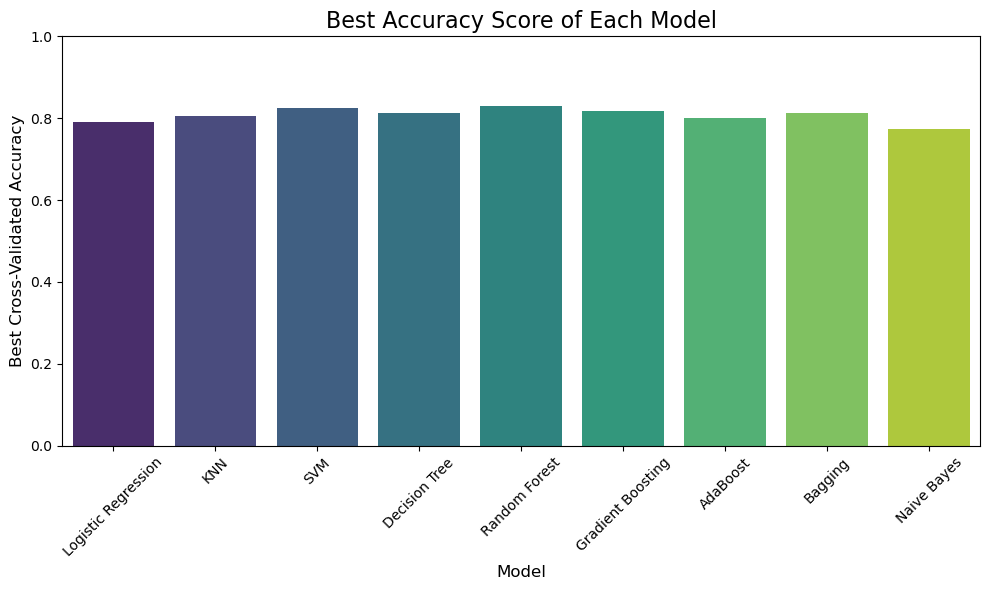

In [74]:
# 📊 Plotting best scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(best_scores.keys()), y=list(best_scores.values()), palette="viridis")
plt.title("Best Accuracy Score of Each Model", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Best Cross-Validated Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
y_pred = best_model.predict(X_test)
test['pred_survived']=y_pred
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,pred_survived
0,3,1,34.5,0,0,7.8292,Q,0
1,3,0,47.0,1,0,7.0000,S,0
2,2,1,62.0,0,0,9.6875,Q,0
3,3,1,27.0,0,0,8.6625,S,0
4,3,0,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,S,0
414,1,0,39.0,0,0,108.9000,C,1
415,3,1,38.5,0,0,7.2500,S,0
416,3,1,27.0,0,0,8.0500,S,0


In [76]:
test['pred_survived'].value_counts()

0    271
1    147
Name: pred_survived, dtype: int64

In [77]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [78]:
test['pred_survived'].value_counts().iloc[0]/len(train)*100

30.41526374859708

In [79]:
y_test=pd.read_csv("gender_submission.csv")
y_test=y_test.drop(['PassengerId'],axis=1)
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [80]:
from sklearn.metrics import classification_report, accuracy_score
print("accuracy_score",accuracy_score(y_test,test['pred_survived']))
print("classification report ",classification_report(y_test,test['pred_survived']))

accuracy_score 0.8588516746411483
classification report                precision    recall  f1-score   support

           0       0.88      0.90      0.89       266
           1       0.82      0.79      0.80       152

    accuracy                           0.86       418
   macro avg       0.85      0.84      0.85       418
weighted avg       0.86      0.86      0.86       418



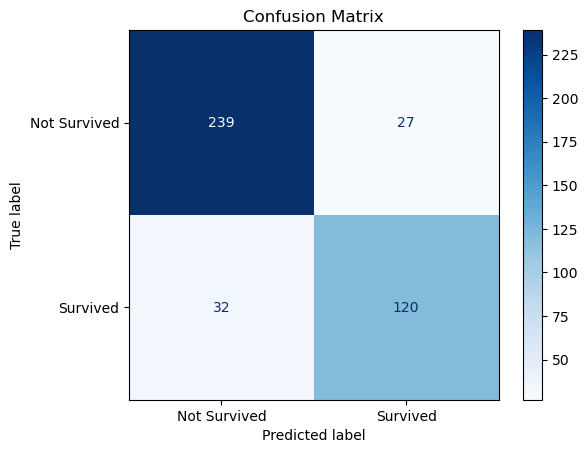

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test['pred_survived'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [82]:
print(f"among {len(train)} people {train['Survived'].value_counts().iloc[0]} ({round((train['Survived'].value_counts().iloc[0]) / len(train) * 100, 2)}%) died and {train['Survived'].value_counts().iloc[1]} ({round(train['Survived'].value_counts().iloc[1] / len(train) * 100, 2)}%) in train data")

print(f"among {len(test)} people {y_test.value_counts().iloc[0]} ({round((y_test.value_counts().iloc[0]) / len(test) * 100, 2)}%) died and {y_test.value_counts().iloc[1]} ({round(y_test.value_counts().iloc[1] / len(test) * 100, 2)}%) in test data")

print(f"among {len(test)} people {test['pred_survived'].value_counts().iloc[0]} ({round((test['pred_survived'].value_counts().iloc[0]) / len(test) * 100, 2)}%) died and {test['pred_survived'].value_counts().iloc[1]} ({round(test['pred_survived'].value_counts().iloc[1] / len(test) * 100, 2)}%) in test data predict")


among 891 people 549 (61.62%) died and 342 (38.38%) in train data
among 418 people 266 (63.64%) died and 152 (36.36%) in test data
among 418 people 271 (64.83%) died and 147 (35.17%) in test data predict
